# Finite Element Formulation 
## Soham S. Phanse
## Topology Optimization

In [1]:
from fenics import *

 Now, we create the mesh on our domain which is $\Omega$ = \[0, 1\] X \[0, 1\]

In [2]:
mesh = UnitSquareMesh(10, 10) #Here, the number 10, 10 decides the number of divisions required in each dimension. 
V = FunctionSpace(mesh, 'P', 1)

Now, we define the boundary conditions applicable on the equation.

In [3]:
u_D = Expression('1 + x[0]*x[0] + x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

Now, we actually define our variational problem which we have formulated above. 

In [4]:
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = dot(grad(u), grad(v))*dx  # These a and L are what we defined in the formulation above. 
L = f*v*dx

Now, we solve the formulation. Note that in the first argument we have provided the variational principle statement. In the second argument, we provided the function which we wnat to solve and then the boundary conditions which we want to impose on the same. 

In [5]:
u = Function(V)
solve(a == L, u, bc) 

Since our problem has been solved now, we can plot the results and the mesh also. 

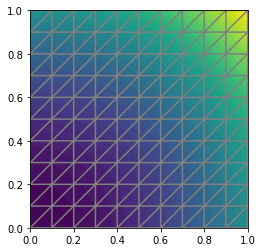

In [6]:
plot(u)
plot(mesh)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)

Axes3D.plot_surface(x, y, u)